###### Import necessary libraries

In [31]:
import re
import pandas as pd
import numpy as np
from sklearn import metrics
import itertools
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

##### Load the data

In [2]:
df=pd.read_csv(r'C:\Users\sunan\Downloads\Fake News Classifier Models\dataset\train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


##### checking nan/null values

In [4]:
df.columns.isna().sum()

0

In [5]:
df.shape

(20800, 5)

In [6]:
######## Data splitting : defining the Dependent and Independent features
X = df.drop(['label', 'author'], axis=1)
y = df['label']

In [7]:
print(X.shape)
print(y.shape)

(20800, 3)
(20800,)


In [8]:
X

,id,title,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal..."


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   text    20761 non-null  object
dtypes: int64(1), object(2)
memory usage: 487.6+ KB


In [10]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [11]:
texts=X.copy()

In [12]:
texts.head(10)

,id,title,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,"In these trying times, Jackie Mason is the Voi..."
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,Ever wonder how Britain’s most iconic pop pian...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,"PARIS — France chose an idealistic, traditi..."
8,8,Excerpts From a Draft Script for Donald Trump’...,Donald J. Trump is scheduled to make a highly ...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",A week before Michael T. Flynn resigned as nat...


In [13]:
texts['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

In [14]:
texts['title'][10]

'Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda'

In [15]:
# Cleaning the texts
corpus = []
for i in range(0,len(texts)):
    review = re.sub('[^a-zA-Z]', ' ',str(texts['title'][i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
corpus[15]

'major leagu soccer argentin find home success new york time'

In [17]:
corpus[10000]

'maggi hassan unseat kelli ayott new hampshir senat race new york time'

# Bag of words model with CountVectorizer for text vectorization

In [18]:
#CounterVectorizer
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [19]:
cv.get_feature_names()[:50]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit']

In [20]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [21]:
# show resulting vocabulary; 
#the numbers are the position in the sparse vector.
cv.vocabulary_

{'hous': 2044,
 'dem': 1098,
 'aid': 84,
 'even': 1436,
 'see': 3878,
 'comey': 827,
 'letter': 2464,
 'jason': 2233,
 'chaffetz': 658,
 'tweet': 4621,
 'comey letter': 829,
 'jason chaffetz': 2234,
 'flynn': 1655,
 'hillari': 1987,
 'clinton': 756,
 'big': 393,
 'woman': 4923,
 'campu': 590,
 'breitbart': 509,
 'hillari clinton': 1989,
 'campu breitbart': 591,
 'truth': 4605,
 'might': 2701,
 'get': 1791,
 'fire': 1616,
 'civilian': 738,
 'kill': 2339,
 'singl': 3998,
 'us': 4686,
 'airstrik': 95,
 'identifi': 2080,
 'us airstrik': 4687,
 'iranian': 2189,
 'jail': 2221,
 'stori': 4176,
 'stone': 4173,
 'death': 1061,
 'jacki': 2218,
 'mason': 2614,
 'hollywood': 2014,
 'would': 4950,
 'love': 2539,
 'trump': 4503,
 'bomb': 456,
 'north': 2945,
 'korea': 2366,
 'lack': 2384,
 'tran': 4463,
 'bathroom': 339,
 'exclus': 1459,
 'video': 4733,
 'jacki mason': 2219,
 'north korea': 2948,
 'video breitbart': 4735,
 'life': 2481,
 'luxuri': 2544,
 'john': 2267,
 'favorit': 1543,
 'shark': 393

In [22]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [23]:
print(X_train.shape)
print(y_train.shape)

(16640, 5000)
(16640,)


In [24]:
print(X_test.shape)
print(y_test.shape)

(4160, 5000)
(4160,)


In [25]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [26]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#confusion matrix plot

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### LogisticRegression

accuracy:   0.940
Confusion matrix, without normalization


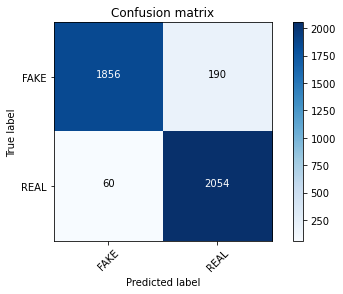

In [39]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(X_train, y_train)
pred = lgc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### MultinomialNB Algorithm

accuracy:   0.90
Confusion matrix, without normalization


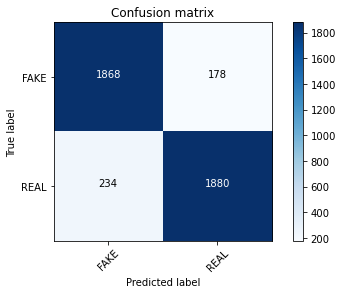

In [36]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### GaussianNB Algorithm


accuracy:   0.82
Confusion matrix, without normalization


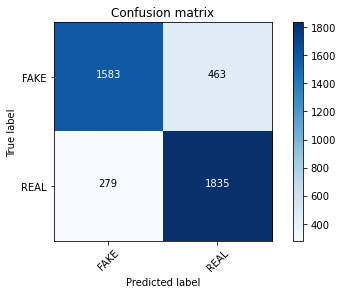

In [37]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### DecisionTreeClassifier

accuracy:   0.92
Confusion matrix, without normalization


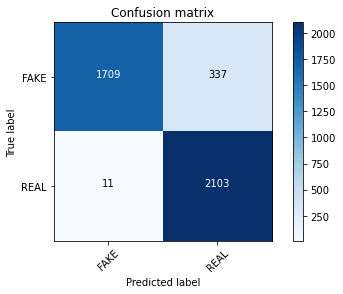

In [38]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### AdaBoostClassifier

accuracy:   0.926
Confusion matrix, without normalization


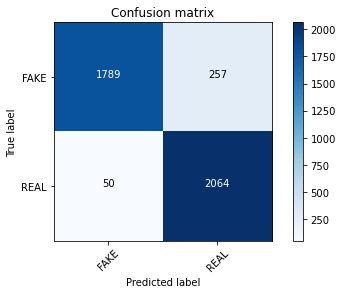

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### RandomForestClassifier

accuracy:   0.938
Confusion matrix, without normalization


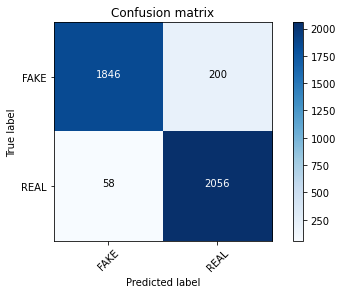

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### SVM

accuracy:   0.939
Confusion matrix, without normalization


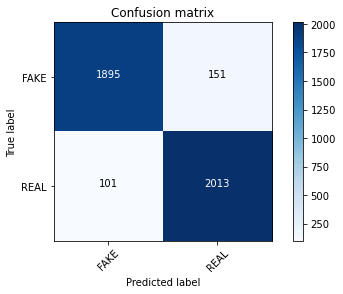

In [42]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# Frequent Real words

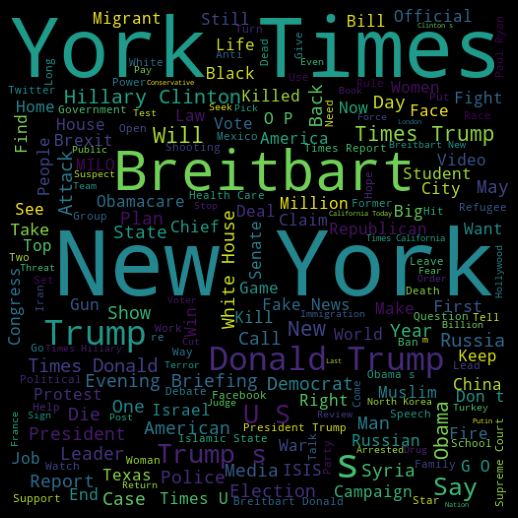

In [32]:
real=' '.join(list(df[df['label']==0]['title']))
real=WordCloud(width=512, height=512).generate(real)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Frequent Fake Words

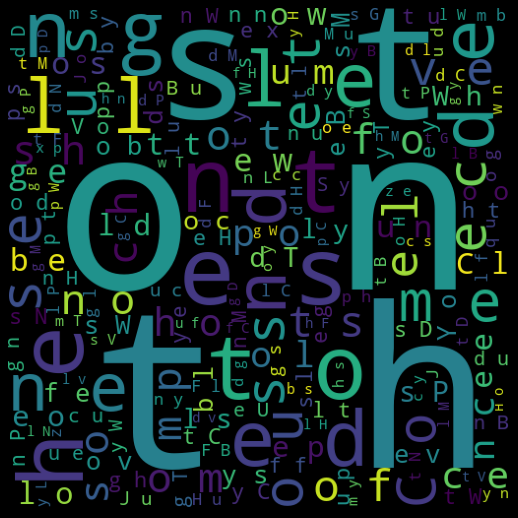

In [35]:
fake=' '.join(str(list(df[df['label']==1]['title'])))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(7,7),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# TFIDF Vectorizer Model for text vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
X=tfidf.fit_transform(corpus).toarray()

In [38]:
tfidf.get_feature_names()[:50]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit']

In [39]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [40]:
tfidf.vocabulary_


{'hous': 2044,
 'dem': 1098,
 'aid': 84,
 'even': 1436,
 'see': 3878,
 'comey': 827,
 'letter': 2464,
 'jason': 2233,
 'chaffetz': 658,
 'tweet': 4621,
 'comey letter': 829,
 'jason chaffetz': 2234,
 'flynn': 1655,
 'hillari': 1987,
 'clinton': 756,
 'big': 393,
 'woman': 4923,
 'campu': 590,
 'breitbart': 509,
 'hillari clinton': 1989,
 'campu breitbart': 591,
 'truth': 4605,
 'might': 2701,
 'get': 1791,
 'fire': 1616,
 'civilian': 738,
 'kill': 2339,
 'singl': 3998,
 'us': 4686,
 'airstrik': 95,
 'identifi': 2080,
 'us airstrik': 4687,
 'iranian': 2189,
 'jail': 2221,
 'stori': 4176,
 'stone': 4173,
 'death': 1061,
 'jacki': 2218,
 'mason': 2614,
 'hollywood': 2014,
 'would': 4950,
 'love': 2539,
 'trump': 4503,
 'bomb': 456,
 'north': 2945,
 'korea': 2366,
 'lack': 2384,
 'tran': 4463,
 'bathroom': 339,
 'exclus': 1459,
 'video': 4733,
 'jacki mason': 2219,
 'north korea': 2948,
 'video breitbart': 4735,
 'life': 2481,
 'luxuri': 2544,
 'john': 2267,
 'favorit': 1543,
 'shark': 393

In [41]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [42]:
print(X_train.shape)
print(y_train.shape)

(16640, 5000)
(16640,)


In [43]:
print(X_test.shape)
print(y_test.shape)

(4160, 5000)
(4160,)


In [44]:
count_df = pd.DataFrame(X_train, columns=tfidf.get_feature_names())

In [45]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zealand,zero,zika,zika viru,zionist,zone,zone new,zoo,zu,zuckerberg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#confusion matrix plot

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


accuracy:   0.88
Confusion matrix, without normalization


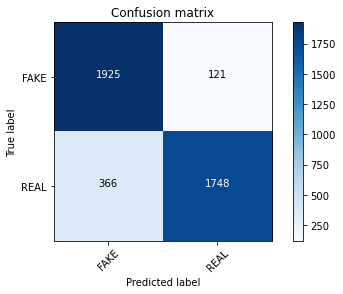

In [30]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.82
Confusion matrix, without normalization


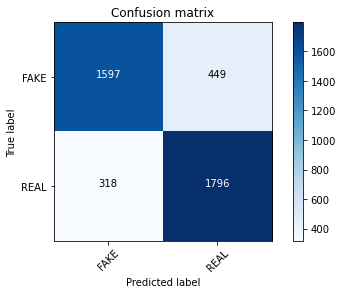

In [31]:

### GaussianNB Algorithm

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])


accuracy:   0.92
Confusion matrix, without normalization


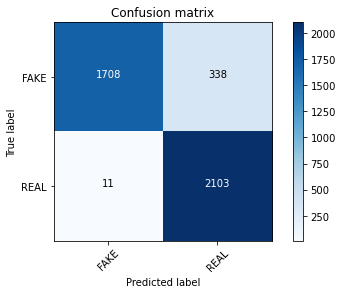

In [32]:
### DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.925
Confusion matrix, without normalization


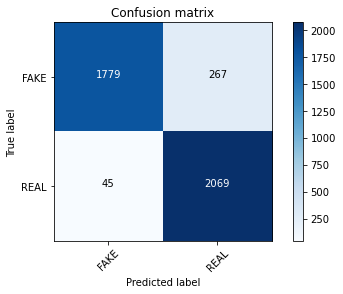

In [33]:
### AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.942
Confusion matrix, without normalization


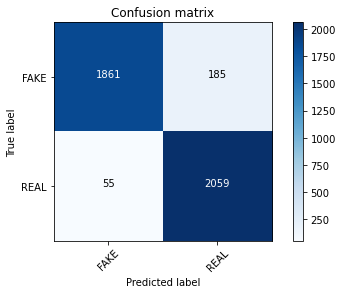

In [34]:

### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.941
Confusion matrix, without normalization


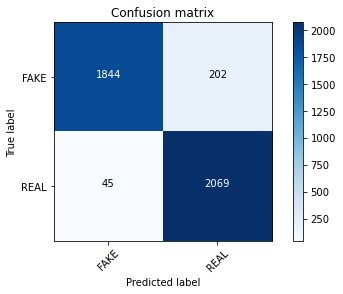

In [35]:
### SVM

from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

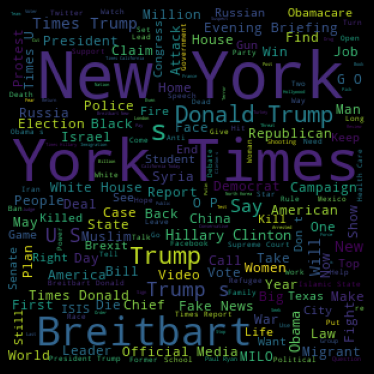

In [53]:

# Frequent Real words

real=' '.join(list(df[df['label']==0]['title']))
real=WordCloud(width=300, height=300).generate(real)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(real)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

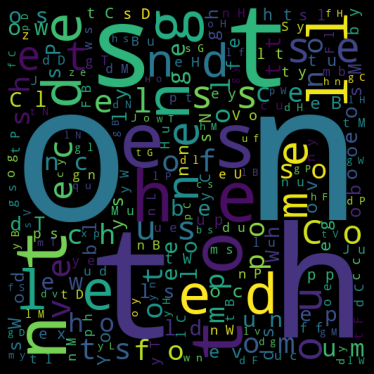

In [54]:
# Frequent Fake Words

fake=' '.join(str(list(df[df['label']==1]['title'])))
fake=WordCloud(width=512, height=512).generate(fake)
plt.figure(figsize=(5,5),facecolor='k')
plt.imshow(fake)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()